In [37]:
import pandas as pd
import numpy as np
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('/kaggle/input/top-1000-steam-games/steam_app_data.csv')
df1 = pd.read_csv("/kaggle/input/top-1000-steam-games/steamspy_data.csv")

# Visão Geral dos dados

In [39]:
pd.set_option('display.max_columns', None)
df.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 1450, 'final': ...","[574941, 7]","[{'name': 'default', 'title': 'Buy Counter-Str...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 137378},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[29],"[{'name': 'default', 'title': 'Buy Team Fortre...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 5474},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,"English, French, German, Italian, Spanish - Spain",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[30],"[{'name': 'default', 'title': 'Buy Day of Defe...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 3694},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum':

In [40]:
df1.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,216345,5530,0,"10,000,000 .. 20,000,000",0,0,0,0,999,999,0,"English, French, German, Italian, Spanish - Sp...",Action,10775,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,6472,990,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,77,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272..."
2,30,Day of Defeat,Valve,Valve,NaN,5686,634,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Spain",Action,89,"{'FPS': 794, 'World War II': 261, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,2242,490,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,8,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,17468,890,0,"2,000,000 .. 5,000,000",0,0,0,0,499,499,0,"English, French, German, Korean",Action,162,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S..."


# Limpeza de Dados

### Observações
- A coluna "Price" aparenta ter valores incorretos.
- O dataset possui muitas colunas sem valor ou com valores incorretos.
- Colunas com descrição de jogo, comentários, screenshots, links, etc não serão úteis nesta análise, por isso vou apenas extrair colunas significativas como: developer, positive, negative, recommendations, etc.

In [41]:
df_imp_cols = ['name', 'type','required_age', 'is_free', 'recommendations', 'price_overview', 'metacritic']
df = df[df_imp_cols]

In [42]:
df1_imp_cols = ['name', 'developer', 'publisher', 'positive', 'negative', 'genre', 'ccu']
df1  = df1[df1_imp_cols]

Fazendo a junção dos dois datasets

In [43]:
# joining the two tables together
df_final = pd.merge(df, df1, on = 'name',  how='inner')
df_final = df_final.reset_index(drop = True)

In [44]:
df_final.head()

,name,type,required_age,is_free,recommendations,price_overview,metacritic,developer,publisher,positive,negative,genre,ccu
0,Counter-Strike,game,0.0,False,{'total': 137378},"{'currency': 'AUD', 'initial': 1450, 'final': ...","{'score': 88, 'url': 'https://www.metacritic.c...",Valve,Valve,216345,5530,Action,10775
1,Team Fortress Classic,game,0.0,False,{'total': 5474},"{'currency': 'AUD', 'initial': 750, 'final': 7...",NaN,Valve,Valve,6472,990,Action,77
2,Day of Defeat,game,0.0,False,{'total': 3694},"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'score': 79, 'url': 'https://www.metacritic.c...",Valve,Valve,5686,634,Action,89
3,Deathmatch Classic,game,0.0,False,{'total': 1924},"{'currency': 'AUD', 'initial': 750, 'final': 7...",NaN,Valve,Valve,2242,490,Action,8
4,Half-Life: Opposing Force,game,0.0,False,{'total': 15478},"{'currency': 'AUD', 'initial': 750, 'final': 7...",NaN,Gearbox Software,Valve,17468,890,Action,162


## Alguns Ajustes

- Abreviando alguns nomes de jogos e desenvolvedoras

In [45]:
def rename_rows(data):
    rename_dict = {
        "CREATIVE ASSEMBLY, Feral Interactive (Mac), Feral Interactive (Linux)": 'Creative Assembly',
        'Counter-Strike: Global Offensive': 'Counter Strike(GO)',
        'PUBG: BATTLEGROUNDS':'PUBG'
    }
    
    if data in rename_dict.keys():
        data = rename_dict[data]
    
    return data

    
# Aplicando o dicionario renomando as linhas especificas
df_final['name'] = df_final['name'].apply(rename_rows)
df_final['developer'] = df_final['developer'].apply(rename_rows)


## Lidando com valores faltantes.

In [46]:
df_final.isnull().sum()

name                 0
type                 6
required_age         6
is_free              6
recommendations     72
price_overview     242
metacritic         358
developer            1
publisher            0
positive             0
negative             0
genre                1
ccu                  0
dtype: int64

- colunas com uma significante quantidade de valores faltantes são : recommendations, price_overview e metacritic.

### Coluna Recommendations
- Substituindo os valores faltantes de 'recommendations' por ```"{'total': 0}```, lidando como se o jogo não teve nenhuma recomendação."
- A coluna 'recommendations' está em formato string.
- Para extrair apenas o valor total de recomendações, irei transformar de string para dict utilizando a biblioteca ast, extraindo apenas o valor total.

In [47]:
import ast
df_final['recommendations'] = df_final['recommendations'].fillna("{'total': 0}")
df_final['recommendations'] = df_final['recommendations'].apply(lambda x: ast.literal_eval(x)['total'])

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

---
### Coluna price_overview

- Muitos valores faltantes também aqui. Irei tratar os valores faltantes no preço como se o jogo fosse gratuito, tranformando os valores para 0. 
- Meu objetivo é extrair apenas o preço final do jogo.
- Da mesma forma da coluna recommendations, price_overview também se encontra no formato string. Realizarei o mesmo processo para extrair o preço final.

In [49]:
df_final['price_overview'] = df_final['price_overview'].fillna("{'final': '0'}") 
# Coletando apenas a chave 'final' e transformando em float
df_final['price_overview'] = df_final['price_overview'].apply(lambda x: float(ast.literal_eval(x)['final'])/100)


---
### Coluna Metacritic
- para este projeto, a chave significante aqui é a 'score', onde armazena o score de cada jogo.
- Irei interpretar os valores faltantes de metacritic como 0, representando que o determinado jogo não teve pontuação de metacritc.

In [50]:
df_final['metacritic'] = df_final['metacritic'].fillna("{'score': '0'}") 

In [51]:
# Coletando apenas a chave 'final' e transformando em float
df_final['metacritic'] = df_final['metacritic'].apply(lambda x: float(ast.literal_eval(x)['score']))

In [52]:
# dando um nome mais apropriado
df_final.rename(columns={'metacritic': 'metacritic_score'}, inplace=True)
df_final['metacritic_score'].head()

0    88.0
1     0.0
2    79.0
3     0.0
4     0.0
Name: metacritic_score, dtype: float64

In [53]:
# removendo as poucas linhas que estavam faltantes, como são poucas, serão irrelevantes para a análise.
df_final = df_final.dropna()

---

# Análise de Dados Exploratória

## Distribuições

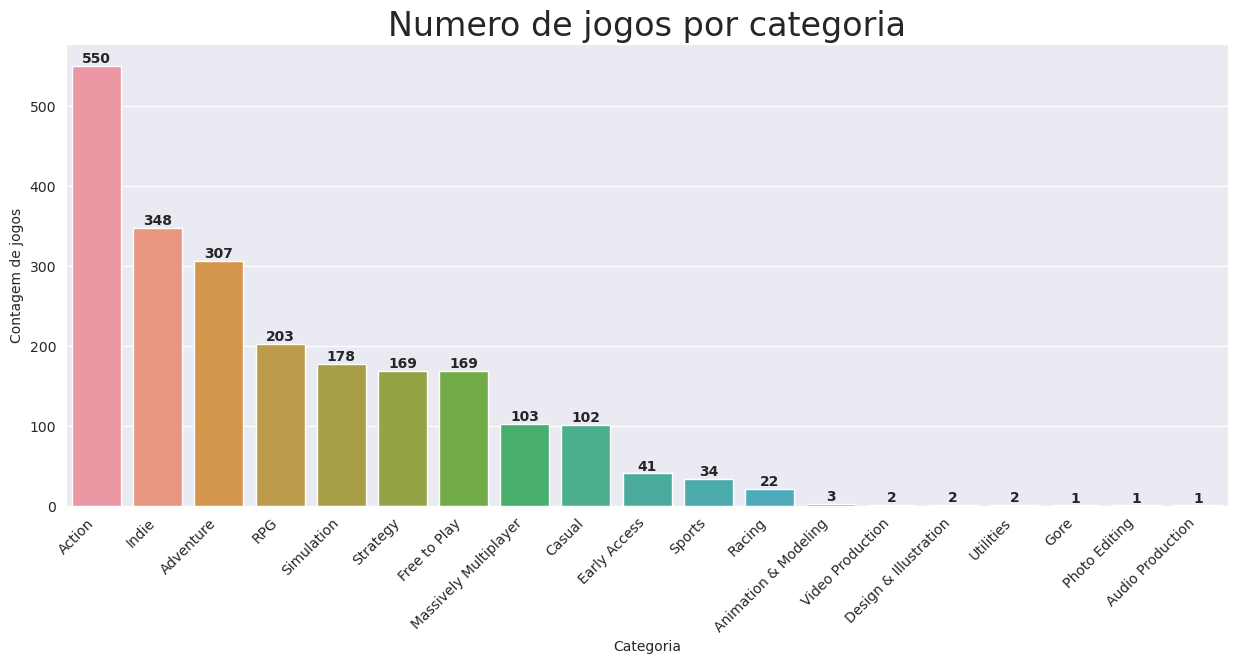

In [54]:
df_final['genre_splitted'] = df_final['genre'].apply(lambda x: x.split(', '))
plt.figure(figsize=(15, 6))
genre_counts = df_final['genre_splitted'].explode().value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Categoria')
plt.ylabel('Contagem de jogos')
plt.title('Numero de jogos por categoria', size = 24)
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(genre_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold')
plt.show()


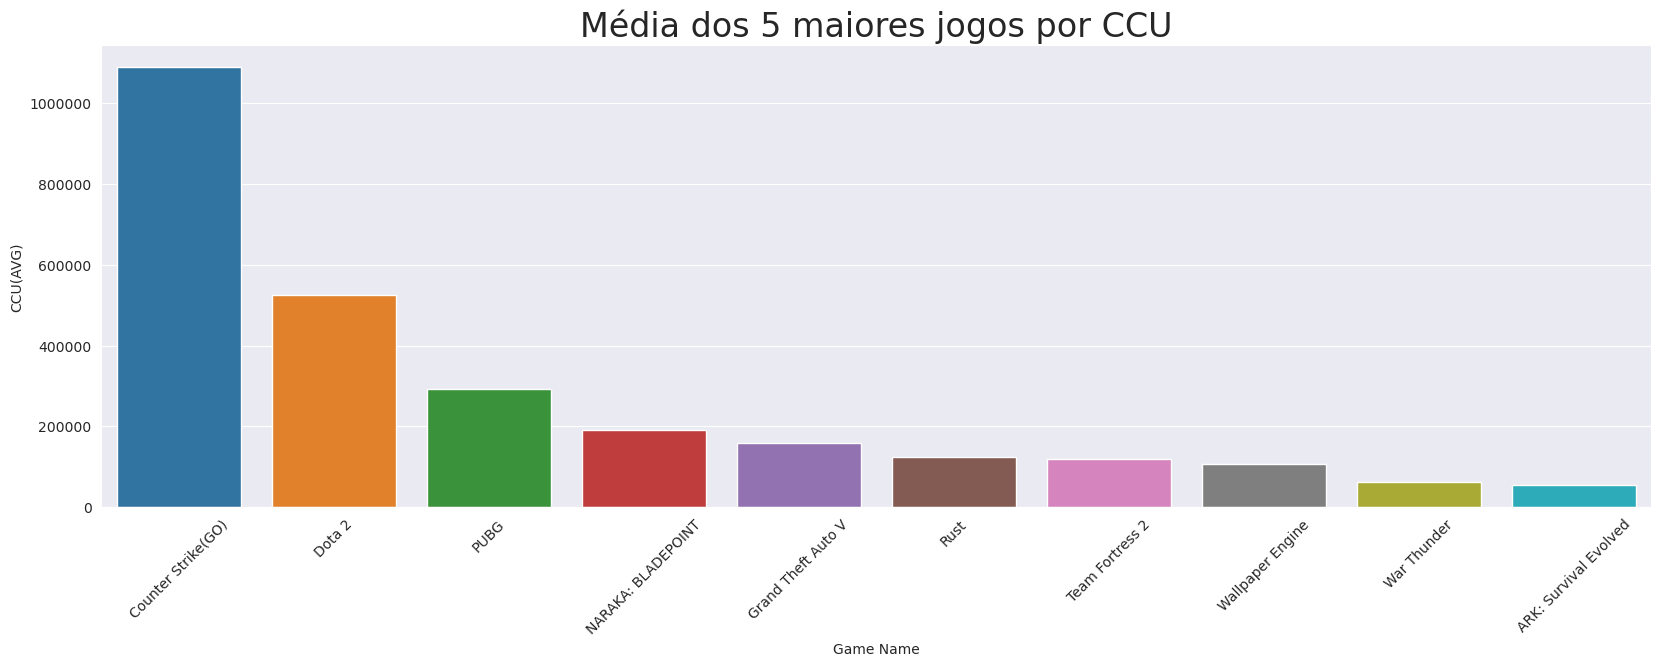

In [55]:
top_10_ccu_games = df_final.sort_values(by = 'ccu', ascending = False)[:10]

plt.figure(figsize=(20, 6))
sns.barplot(x = top_10_ccu_games.name, y = top_10_ccu_games.ccu)
plt.xticks(rotation=45)
plt.xlabel('Game Name')
plt.ylabel('CCU(AVG)')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Média dos 5 maiores jogos por CCU', size = 24)
plt.show()


**CCU(Concurrent Users) - Números de usuários acessando o jogo.**

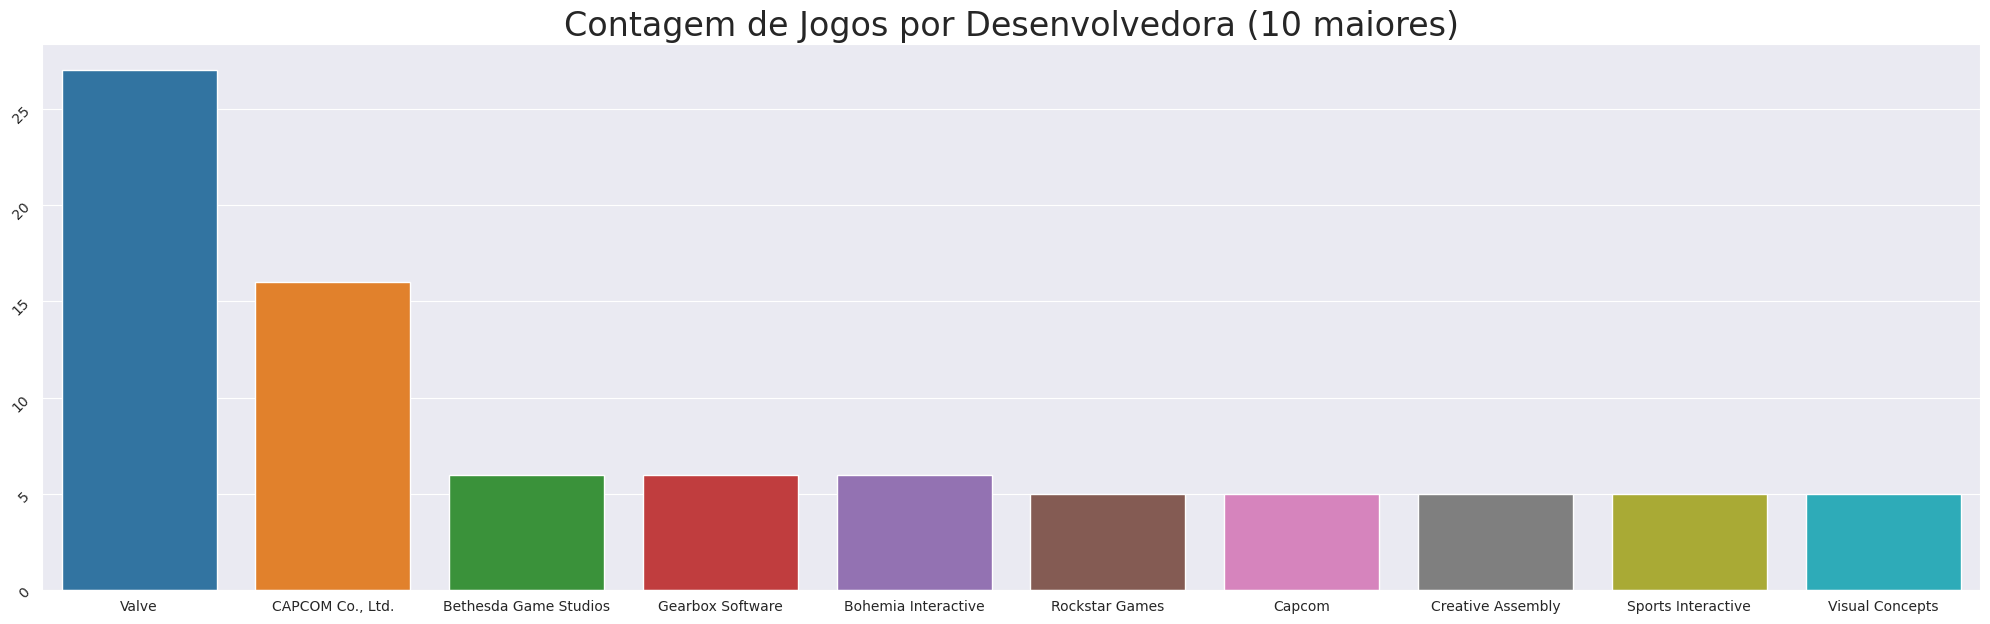

In [56]:
g_dev = df_final['developer'].value_counts()[:10]
plt.figure(figsize = (20,6))
sns.barplot(x = g_dev.index, y = g_dev.values)
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Contagem de Jogos por Desenvolvedora (10 maiores)', size = 24)
plt.show()

---
## Avaliações e Recomendações

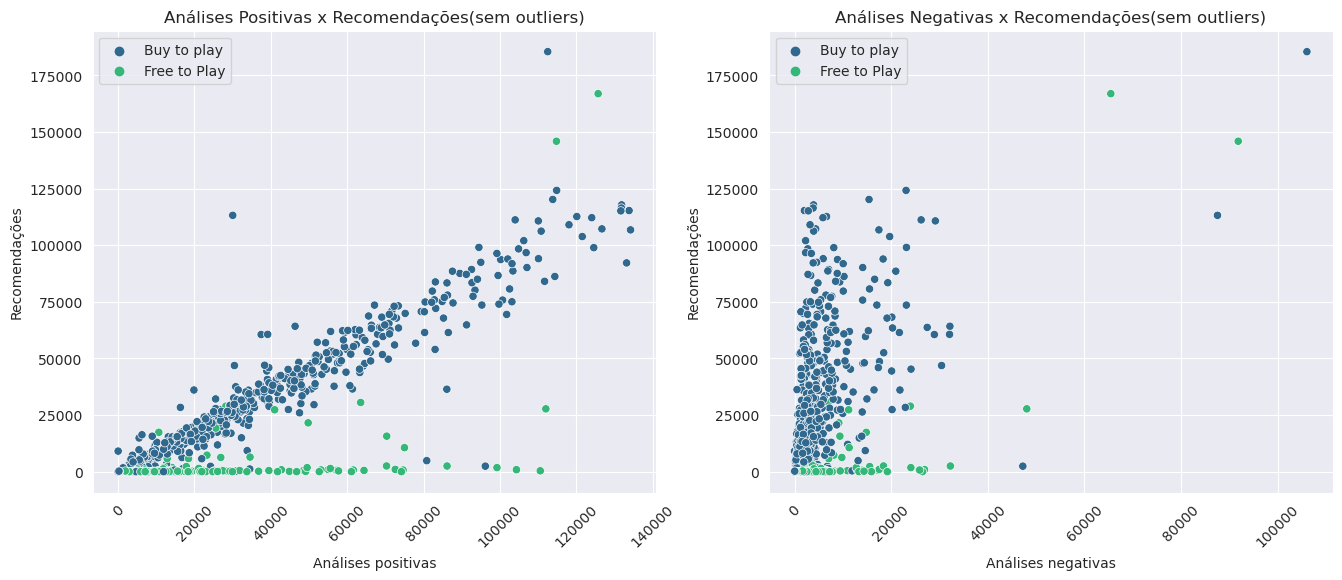

In [57]:
# Removendo Outliers
Q1 = df_final['positive'].quantile(0.25)
Q3 = df_final['positive'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

scatter_reviews = df_final[(df_final['positive'] >= lower_bound) & (df_final['positive'] <= upper_bound)]
scatter_reviews['is_free'] = scatter_reviews['is_free'].apply(lambda x: 'Free to Play' if x else 'Buy to play') 


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data=scatter_reviews, x="positive", y="recommendations", hue = 'is_free', ax = ax1, palette = 'viridis')
ax1.set_xlabel('Análises positivas')
ax1.set_ylabel('Recomendações')
ax1.set_title('Análises Positivas x Recomendações(sem outliers)', size = 12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend()

# Subplot 2: Average Negative Reviews
sns.scatterplot(data=scatter_reviews, x="negative", y="recommendations", hue = 'is_free', ax = ax2, palette = 'viridis')
ax2.set_xlabel('Análises negativas')
ax2.set_ylabel('Recomendações')
ax2.set_title('Análises Negativas x Recomendações(sem outliers)', size = 12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.legend()
plt.show()

- Quanto mais análises positivas, maior o número de recomendações em jogos 'Buy to Play'.
- jogos com um um número maior que 2000 análises negativas tendem a ser pouco recommendados.
- Importante notar também que, em jogos grátis(Free to Play), a quantidade de análises positivas possuem pouca influência no aumento de recomendações.

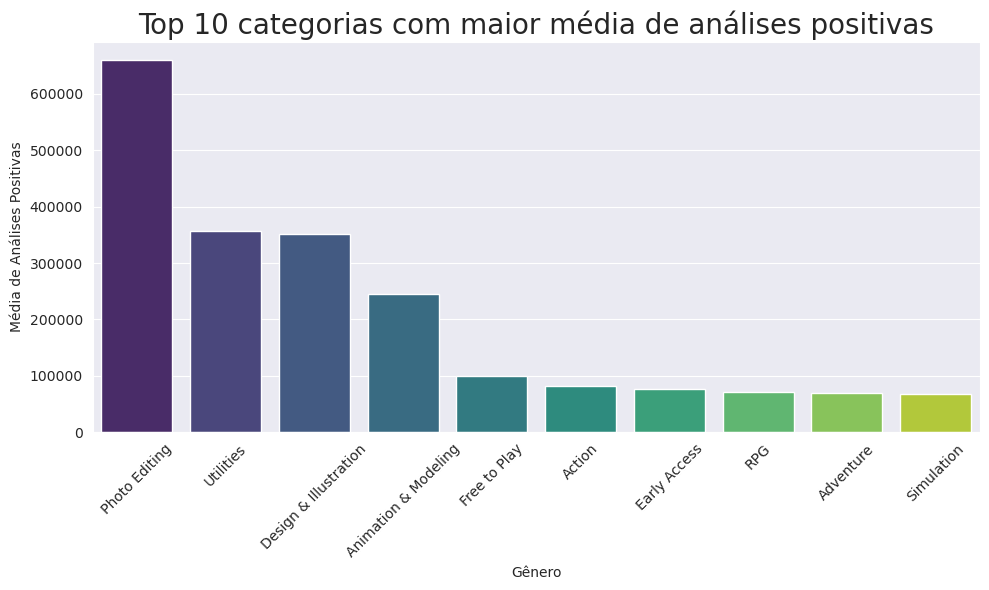

In [58]:
# Calculate average positive and negative reviews for each genre
genre_reviews = df_final.explode('genre_splitted').groupby('genre_splitted')[['price_overview', 'positive', 'negative']].mean().reset_index()


top_10_categories = genre_reviews.nlargest(10, 'positive')

plt.figure(figsize=(10, 6))
sns.barplot(x = top_10_categories['genre_splitted'], y = top_10_categories['positive'], palette = 'viridis')
plt.xlabel('Gênero')
plt.ylabel('Média de Análises Positivas')
plt.title('Top 10 categorias com maior média de análises positivas', size  = 20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

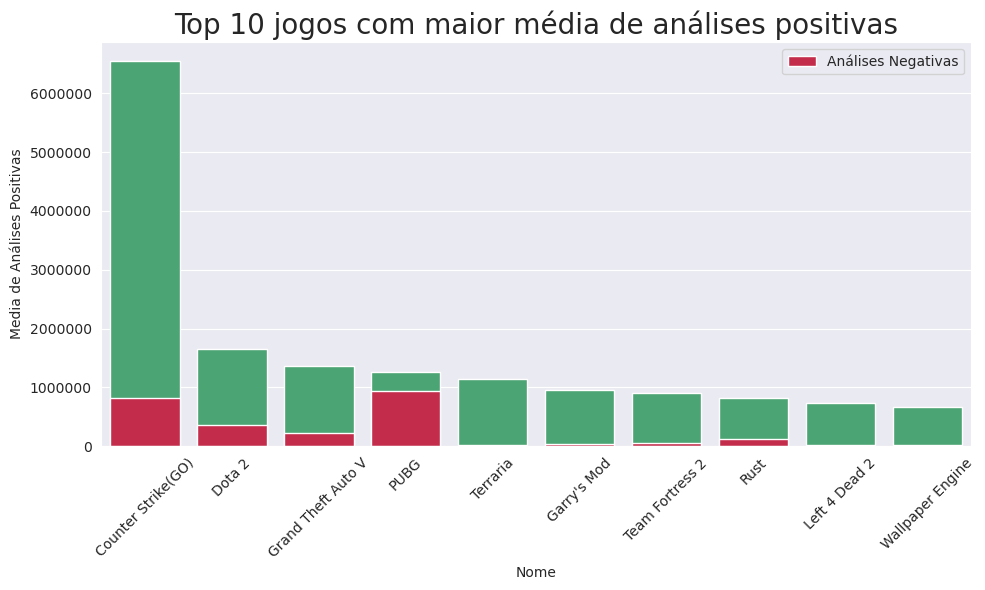

In [59]:
names = df_final.explode('genre_splitted').groupby('name')[['positive', 'negative', 'recommendations']].mean().reset_index()
top_10_games = names.nlargest(10, 'positive')


plt.figure(figsize=(10, 6))
sns.barplot(x = top_10_games['name'], y = top_10_games['positive'], color = 'mediumseagreen')
sns.barplot(x = top_10_games['name'], y = top_10_games['negative'], color = 'crimson', label = 'Análises Negativas')
plt.xlabel('Nome')
plt.ylabel('Media de Análises Positivas')
plt.title('Top 10 jogos com maior média de análises positivas', size  = 20)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.legend()
plt.show()

---
# Free Games

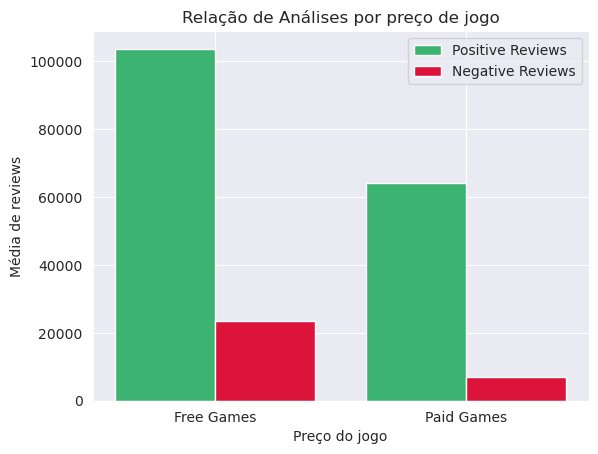

In [60]:
free_games = df_final[df_final['is_free'] == True]
paid_games = df_final[df_final['is_free'] == False]

free_avg_positive_reviews = free_games['positive'].mean()
free_avg_negative_reviews = free_games['negative'].mean()

paid_avg_positive_reviews = paid_games['positive'].mean()
paid_avg_negative_reviews = paid_games['negative'].mean()

labels = ['Free Games', 'Paid Games']
avg_positive_reviews = [free_avg_positive_reviews, paid_avg_positive_reviews]
avg_negative_reviews = [free_avg_negative_reviews, paid_avg_negative_reviews]

x = range(len(labels))

plt.bar(x, avg_positive_reviews, width=0.4, label='Positive Reviews', color = 'mediumseagreen')
plt.bar([i + 0.4 for i in x], avg_negative_reviews, width=0.4, label='Negative Reviews', color = 'crimson')

plt.xticks([i + 0.2 for i in x], labels)
plt.xlabel('Preço do jogo')
plt.ylabel('Média de reviews')
plt.title('Relação de Análises por preço de jogo')
plt.legend()
plt.show()


---
## Metacrítica

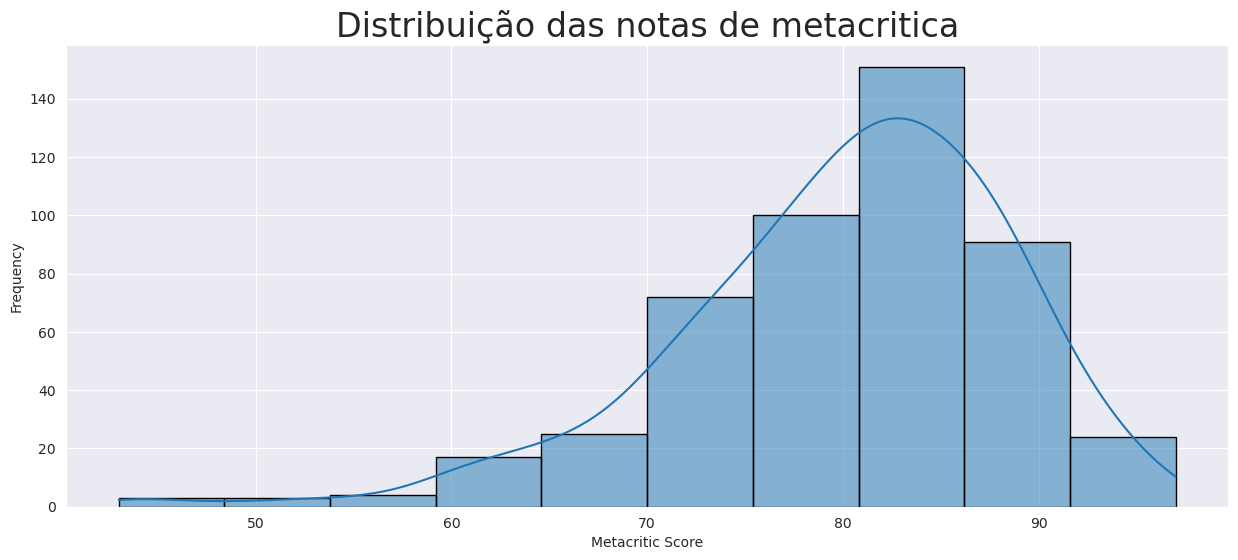

In [61]:
has_metacritic = df_final[df_final['metacritic_score'] > 0]

plt.figure(figsize=(15, 6))
sns.histplot(x =has_metacritic['metacritic_score'], kde = True, bins = 10, edgecolor = 'black', palette = 'viridis')
plt.xlabel('Metacritic Score')
plt.ylabel('Frequency')
plt.title('Distribuição das notas de metacritica', size = 24)
plt.show()

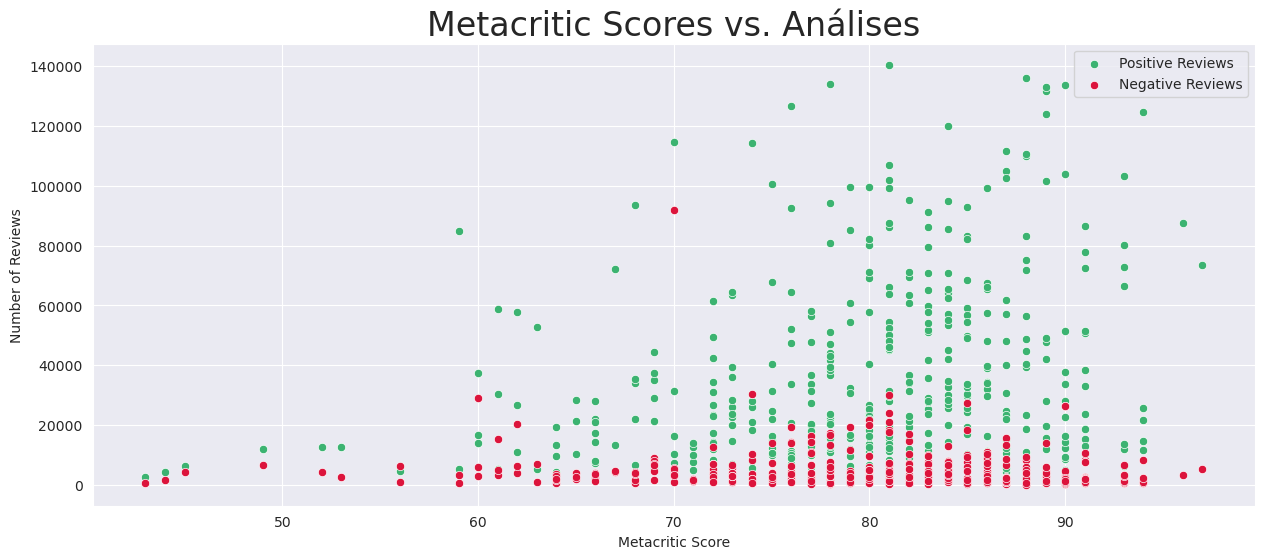

In [62]:
# Removendo Outliers
Q1 = has_metacritic['positive'].quantile(0.25)
Q3 = has_metacritic['positive'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

scatter_critics = has_metacritic[(has_metacritic['positive'] >= lower_bound) & (has_metacritic['positive'] <= upper_bound)]

plt.figure(figsize = (15, 6))
sns.scatterplot(x = scatter_critics['metacritic_score'], y = scatter_critics['positive'],color= 'mediumseagreen', label='Positive Reviews')
sns.scatterplot(x = scatter_critics['metacritic_score'], y = scatter_critics['negative'],color = 'crimson', label='Negative Reviews')
plt.xlabel('Metacritic Score')
plt.ylabel('Number of Reviews')
plt.legend()
plt.title('Metacritic Scores vs. Análises', size = 24)
plt.show()


- A medida em que as notas de metacrítica aumentam, as reviews positivas também aumentam.
- Reviews negativas não possuem uma correlação com notas de metacrítica, elas não aumentam ou diminuiem conforme as notas crescem.
- Poucos jogos foram avaliados com uma nota menor que 60.

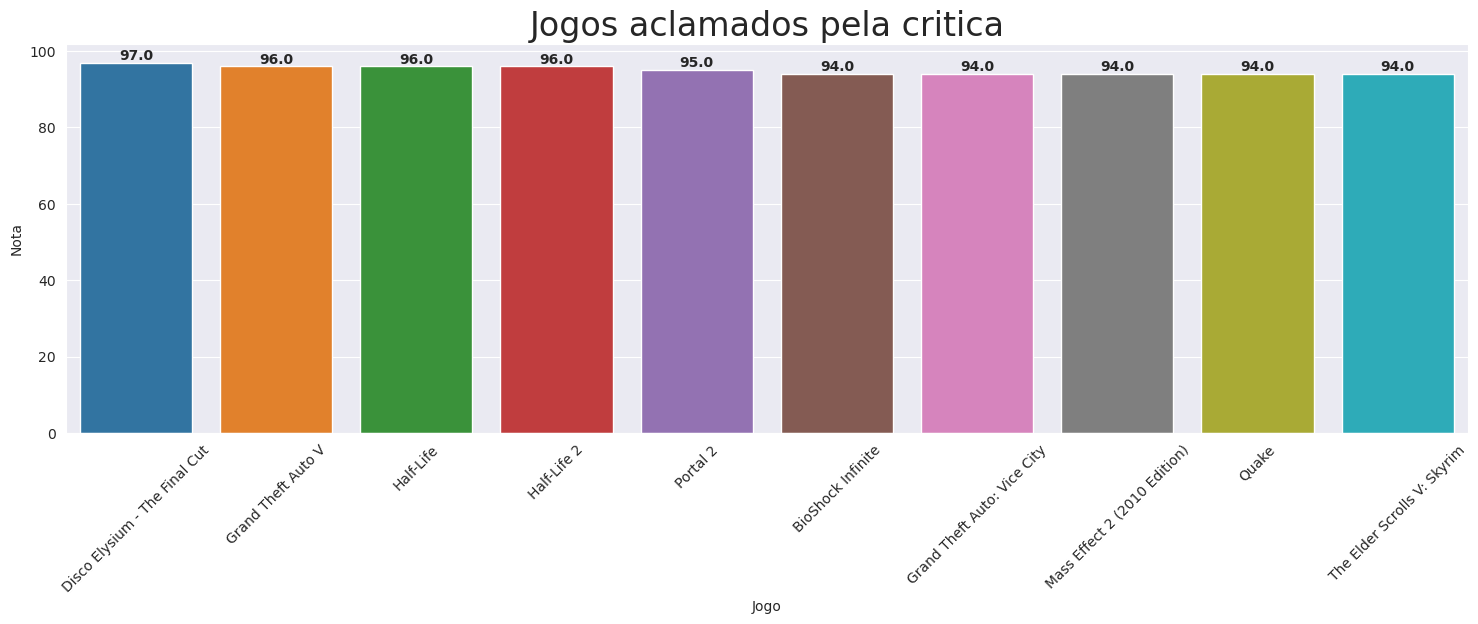

In [63]:
# top 10 jogos
top_10_critics = has_metacritic.nlargest(10, 'metacritic_score')

plt.figure(figsize = (15,6))
average_score_by_genre = top_10_critics.groupby('name')['metacritic_score'].mean().sort_values(ascending=False)
sns.barplot(x = average_score_by_genre.index, y = average_score_by_genre)
plt.xticks(rotation=45)
# Colocando os numeros no top das barras
for index, value in enumerate(average_score_by_genre):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontweight = 'bold')
plt.xlabel('Jogo')
plt.ylabel('Nota')
plt.tight_layout()
plt.title('Jogos aclamados pela critica', size = 24)
plt.show()


---
## Análises de Preços

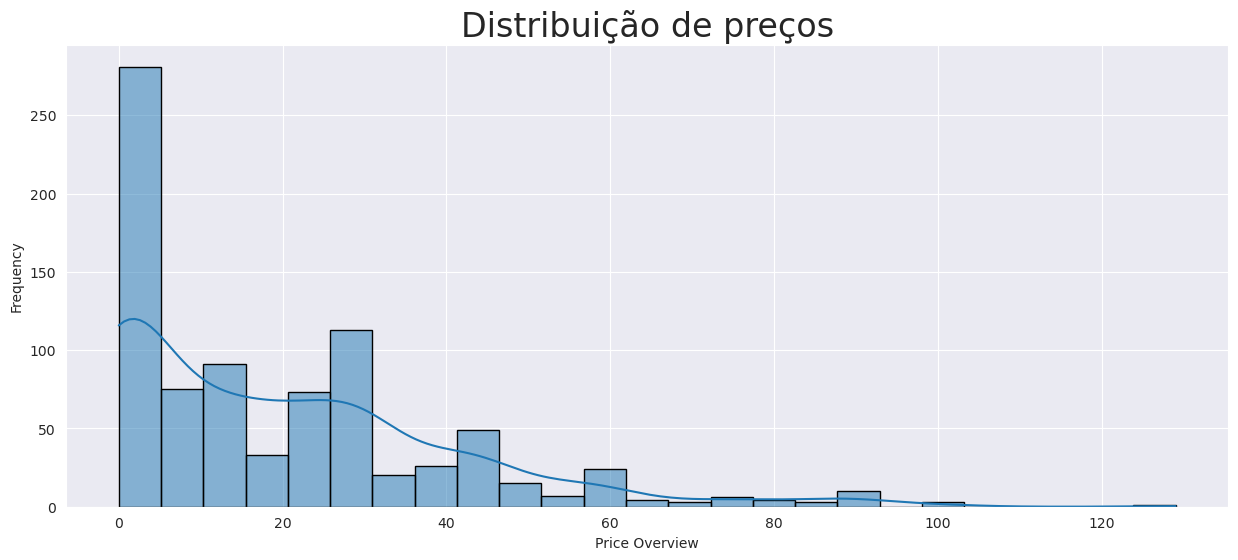

In [64]:
plt.figure(figsize=(15, 6))
sns.histplot(x = df_final['price_overview'], bins = 25, edgecolor = 'black', palette = 'viridis', kde = True)
plt.xlabel('Price Overview')
plt.ylabel('Frequency')
plt.title('Distribuição de preços', size = 24)
plt.show()

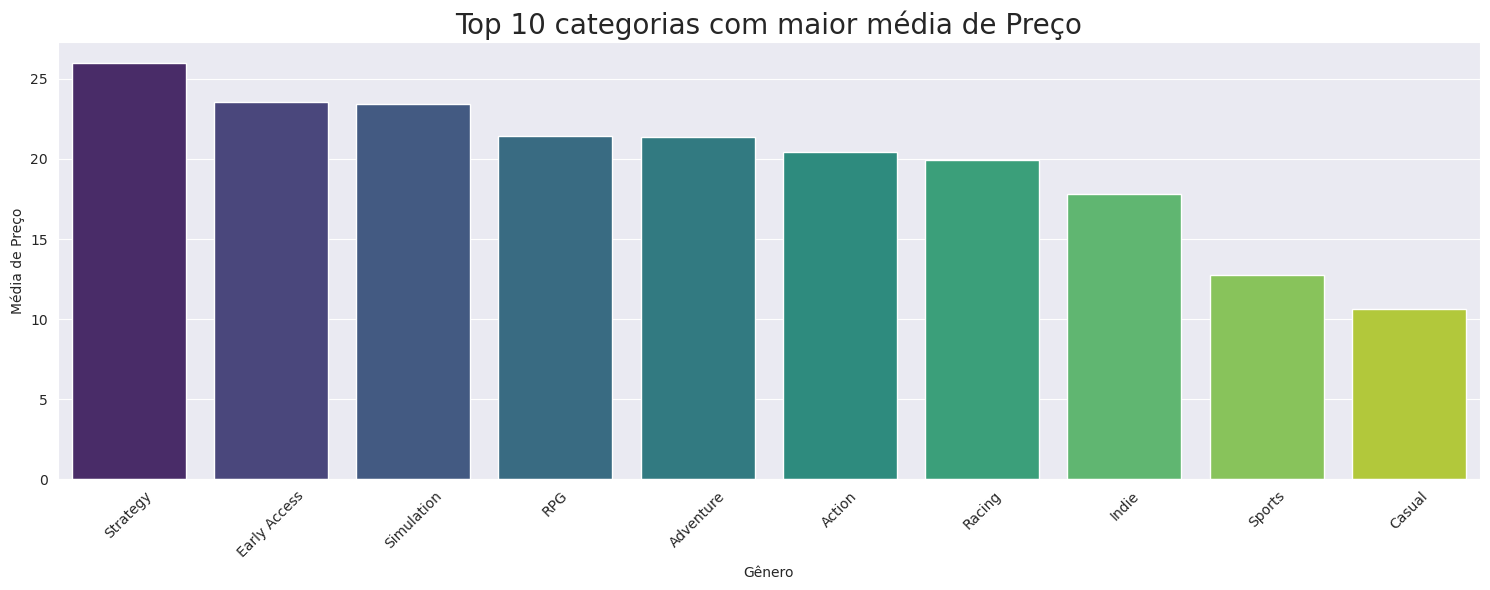

In [65]:
top_10_categories = genre_reviews.nlargest(10, 'price_overview')

plt.figure(figsize=(15, 6))
sns.barplot(x = top_10_categories['genre_splitted'], y = top_10_categories['price_overview'], palette = 'viridis')
plt.xlabel('Gênero')
plt.ylabel('Média de Preço')
plt.title('Top 10 categorias com maior média de Preço', size  = 20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

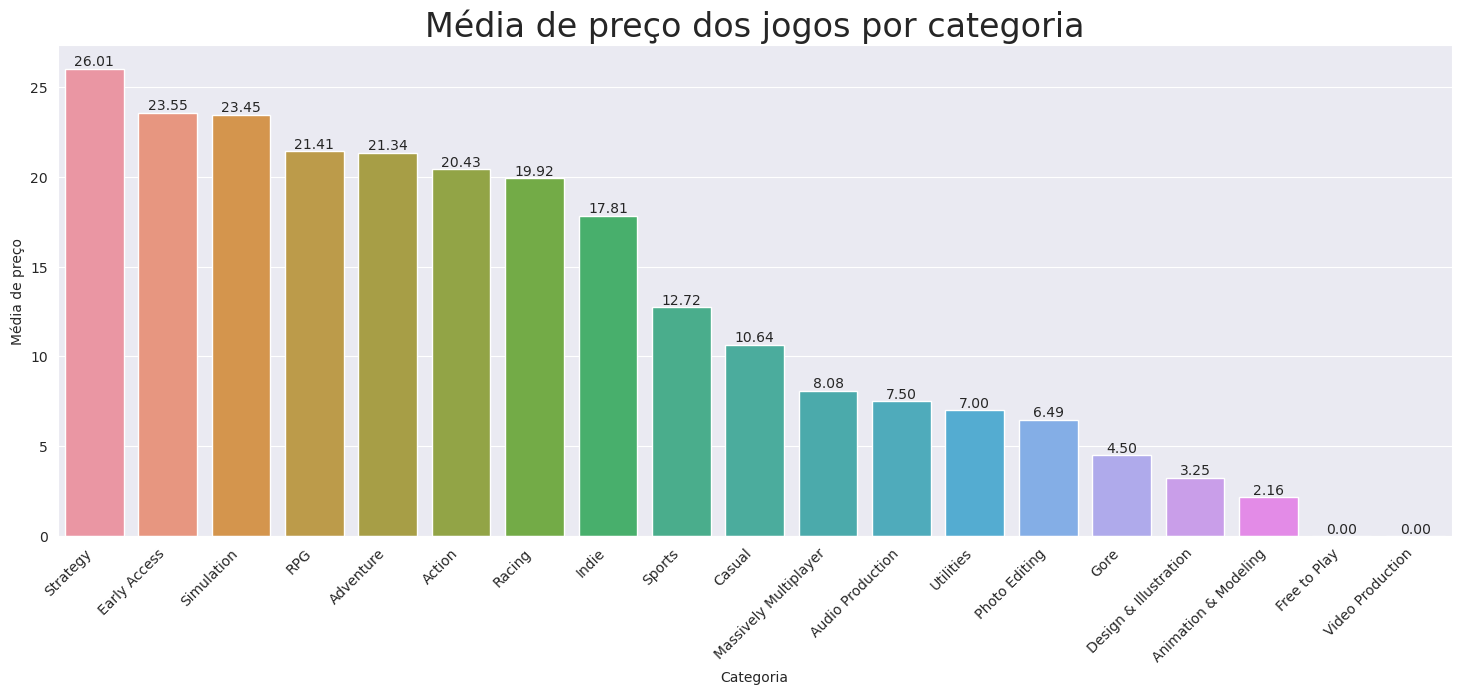

In [66]:
# Agrupando os dados pela categoria e calculando a média de preço.
average_prices_by_genre = df_final.explode('genre_splitted').groupby('genre_splitted')['price_overview'].mean().reset_index()
# top 20 ordem decrescente
average_prices_by_genre = average_prices_by_genre.nlargest(20, 'price_overview')

# Create a bar plot
plt.figure(figsize=(15, 6))
#average_prices_by_genre.plot(kind='bar', color='skyblue')
sns.barplot(x = average_prices_by_genre['genre_splitted'], y = average_prices_by_genre['price_overview'])
# Set plot labels and title
plt.xlabel('Categoria')
plt.ylabel('Média de preço')
plt.title('Média de preço dos jogos por categoria', size = 24)
for index, value in enumerate(average_prices_by_genre['price_overview']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


---
## Retoques Finais
Antes de fazer o upload do dataset para o aws bucket, é necessário realizar algumas alterações no dado:
1. Vou remover a coluna 'genre_splitted' que foi criada apenas para facilitar a análise gráfica, evitando redundância com a tabela 'genre'.

2. Converter o tipo da coluna 'is_free' para boleano, já que existem apenas valores binários.

3. Alguns campos de valor string possui caracteres com vírgula, por este motivo, já que o arquivo separa os valores pela vírgula, vou substituir os o caracter ',' das colunas strings para '/' para evitar conflito na hora de fazer o upload para o bucket.

In [67]:
df_final

,name,type,required_age,is_free,recommendations,price_overview,metacritic_score,developer,publisher,positive,negative,genre,ccu,genre_splitted
0,Counter-Strike,game,0.0,False,137378,14.50,88.0,Valve,Valve,216345,5530,Action,10775,[Action]
1,Team Fortress Classic,game,0.0,False,5474,7.50,0.0,Valve,Valve,6472,990,Action,77,[Action]
2,Day of Defeat,game,0.0,False,3694,7.50,79.0,Valve,Valve,5686,634,Action,89,[Action]
3,Deathmatch Classic,game,0.0,False,1924,7.50,0.0,Valve,Valve,2242,490,Action,8,[Action]
4,Half-Life: Opposing Force,game,0.0,False,15478,7.50,0.0,Gearbox Software,Valve,17468,890,Action,162,[Action]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,Brotato,game,0.0,False,42508,7.50,0.0,Blobfish,Blobfish,42583,1412,"Action, Casual, Indie, RPG",13787,"[Action, Casual, Indie, RPG]"
844,Escape the Backrooms,game,0.0,False,26628,14.50,0.0,Fancy Games,Fancy Games,28624,3371,"Indie, Early Access",3524,"[Indie, Early Access]"
845,Broken Edge,game,0.0,False,239,10.15,0.0,TREBUCHET,Fast Travel Games,222,44,Action,55,[Action]
846,Inside the Backrooms,game,0.0,False,29745,10.00,0.0,MrFatcat,"MrFatcat, Dropsiick",30414,5454,"Adventure, Indie, Early Access",1412,"[Adventure, Indie, Early Access]"


In [68]:
# removendo a coluna 'genre_splitted'
df_final = df_final.drop('genre_splitted', axis = 1)

# Convertendo a coluna 'is_free' Para Boolean (True/False)
df_final['is_free'] = df_final['is_free'].astype(bool)

In [69]:
# subustituindo caracteres ', ' por '/'
df_final = df_final.replace({',':'/'}, regex = True)

In [70]:
df_final

,name,type,required_age,is_free,recommendations,price_overview,metacritic_score,developer,publisher,positive,negative,genre,ccu
0,Counter-Strike,game,0.0,False,137378,14.50,88.0,Valve,Valve,216345,5530,Action,10775
1,Team Fortress Classic,game,0.0,False,5474,7.50,0.0,Valve,Valve,6472,990,Action,77
2,Day of Defeat,game,0.0,False,3694,7.50,79.0,Valve,Valve,5686,634,Action,89
3,Deathmatch Classic,game,0.0,False,1924,7.50,0.0,Valve,Valve,2242,490,Action,8
4,Half-Life: Opposing Force,game,0.0,False,15478,7.50,0.0,Gearbox Software,Valve,17468,890,Action,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,Brotato,game,0.0,False,42508,7.50,0.0,Blobfish,Blobfish,42583,1412,Action/ Casual/ Indie/ RPG,13787
844,Escape the Backrooms,game,0.0,False,26628,14.50,0.0,Fancy Games,Fancy Games,28624,3371,Indie/ Early Access,3524
845,Broken Edge,game,0.0,False,239,10.15,0.0,TREBUCHET,Fast Travel Games,222,44,Action,55
846,Inside the Backrooms,game,0.0,False,29745,10.00,0.0,MrFatcat,MrFatcat/ Dropsiick,30414,5454,Adventure/ Indie/ Early Access,1412


In [71]:
df_final.to_csv('steam_games.csv', index = False)